In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
from IPython import display 

In [2]:
def crosspoints(tx,ty,vx,vy):
    # compute intersection points of peoples viewing
    pts = []
    for i in range(len(tx)):
        for j in range(i+1, len(tx)):
            X = np.array([[tx[i]-tx[j]],[ty[i]-ty[j]]])
            A = np.array([[-vx[i], vx[j]],[-vy[i], vy[j]]])
            y = np.dot(np.linalg.inv(A),X)
            y = np.squeeze(y)
            if y[0] > 0:
                pts.append([tx[i]+y[0]*vx[i],ty[i]+y[0]*vy[i]])
    
    if len(pts) > 0:
        pts = np.vstack(pts)
    
    return pts

In [3]:
x = pd.read_table('360deg\Geidai-360-0.tsv',comment='#')
fmax = np.max(x['Frame'].to_numpy())

In [4]:
cpoints = []
fpoints_x = []
fpoints_y = []

#fig = plt.figure(figsize=(5,5))
#plt.xlim(-6000,6000)
#plt.ylim(-6000,6000)

for f in range(fmax):
    face_Tx = x[x['Frame'] == f]['face_Tx'].to_numpy()
    face_Ty = x[x['Frame'] == f]['face_Ty'].to_numpy()
    yaw_w = x[x['Frame'] == f]['yaw_w'].to_numpy()
    p = crosspoints(face_Tx, face_Ty, np.cos(yaw_w), np.sin(yaw_w))
    
    if len(p) > 0:
        cpoints.append(p)
    
    if len(face_Tx) > 0:
        fpoints_x.append(face_Tx)
        fpoints_y.append(face_Ty)        

In [5]:
cp = np.vstack(cpoints)

In [6]:
fpoints_x = np.hstack(fpoints_x)
fpoints_y = np.hstack(fpoints_y)

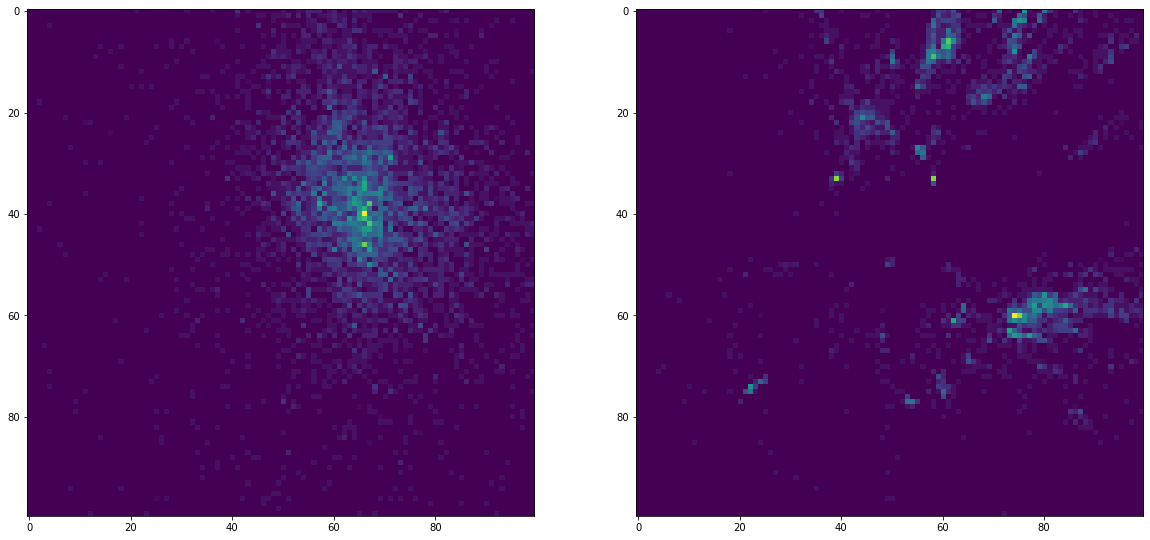

<Figure size 432x288 with 0 Axes>

In [7]:
heatmap1, xedges1, yedges1 = np.histogram2d(cp[:,0], cp[:,1], bins=100, range=[[-2000,2000],[-2000,2000]])
heatmap2, xedges2, yedges2 = np.histogram2d(fpoints_x, fpoints_y, bins=100, range=[[-2000,2000],[-2000,2000]])

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(heatmap1)
plt.subplot(1,2,2)
plt.imshow(heatmap2)
plt.show()
plt.savefig('image.png')

In [15]:
%matplotlib widget

fig, ax = plt.subplots()
artists = []

plt.xlim(-3000,3000)
plt.ylim(-3000,3000)

for f in range(100):
    face_Tx = x[x['Frame'] == f]['face_Tx'].to_numpy()
    face_Ty = x[x['Frame'] == f]['face_Ty'].to_numpy()
    yaw_w = x[x['Frame'] == f]['yaw_w'].to_numpy()
    art = ax.quiver(face_Tx, face_Ty, np.cos(yaw_w), np.sin(yaw_w), scale=7)
    # frame = plt.scatter(face_Tx, face_Ty, c='r', s=20);
    artists.append(art)

<IPython.core.display.Javascript object>

In [16]:
# 描画
anim = ArtistAnimation(fig, artists)
plt.show()

In [19]:
plt.show(artists[0])